## Titanic Project
By Aliakbar Mohsin

#### Problem Statement:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [83]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


By looking at the dataset and problem statement, we can say that Survived is the target column and target column data is classification(integer) type. So we can conclude that titanic project is a classification problem.

## EDA

In [85]:
df.shape

(891, 12)

Our dataset has 891 rows and 12 columns

In [86]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We notice that Name, Sex, Ticket, Cabin, Embarked has object type values and rest has integer/float type values

In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We notice that Age has 177, Cabin has 687 and Embarked has 2 null values

In [88]:
df["Survived"].unique()

array([0, 1], dtype=int64)

We notice that our target column has only 2 classes

In [89]:
#Checking unique values in each column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Above is the list of unique count in each column.

In [90]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

The value count of target column looks imbalanced. I need to balance it.

In [91]:
#Checking for any empty observation in target column
df.loc[df['Survived'] == " "]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


I can notice there is no empty observation in my target column.

In [92]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


I can see the statistics of my dataset and some columns are missing as they are object type data. I need to encode them. 
Some other observations:
1. There are a total of 891 passengers in our dataset (from Count)
2. There is very less mean value for the survived, it means very less people survived. (from Mean)
3. The mean of age are around 30, it means that most of the middle age people were travelling. (from Mean)
4. For age min value is 0.42, it means some infants were also travelling (of few months).

### Univariate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

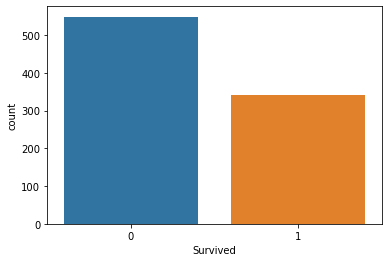

In [93]:
sn.countplot(df['Survived'])

I can clearly see the data imbalance in my target colummn. I can use undersamping or oversampling to balance the data. Over sampling will be preferred as it will avoid any data loss.

<AxesSubplot:xlabel='Age', ylabel='Density'>

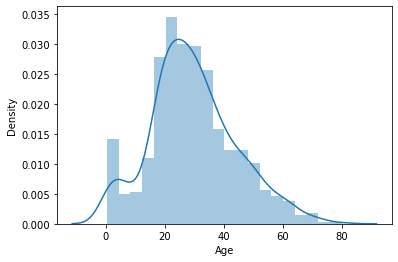

In [94]:
sn.distplot(df['Age'])

Looks like Age is normally distributed.

<AxesSubplot:xlabel='Fare', ylabel='Density'>

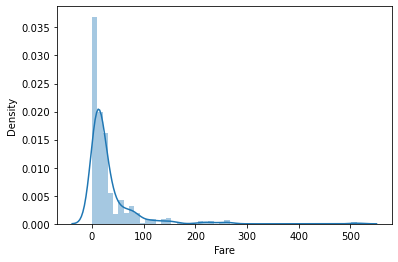

In [95]:
sn.distplot(df['Fare'])

Fare looks skewed.

### Bivariate Analysis

<AxesSubplot:title={'center':'Comparision between 2 feature columns'}, xlabel='Pclass', ylabel='Sex'>

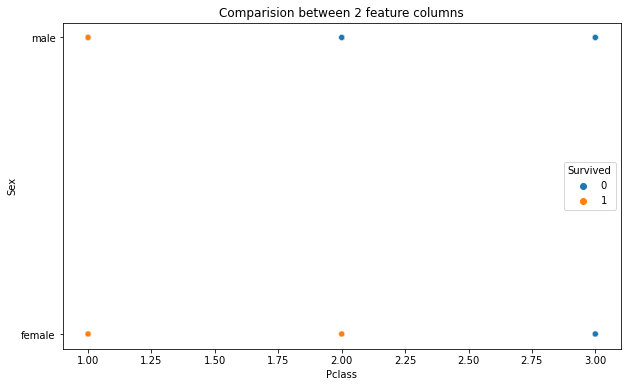

In [96]:
plt.figure(figsize=[10,6])
plt.title('Comparision between 2 feature columns')
sn.scatterplot(df['Pclass'], df['Sex'], hue=df['Survived'])

I can notice that male and female in 1st class survived. Female in class 2 survived but males are dead. Both male and female are dead in 3rd class.

By this we can conclude that rich people who selected costliest class are alive. Which means safety was good with luxurious class and people who were poor had no safety.

<AxesSubplot:xlabel='Age', ylabel='SibSp'>

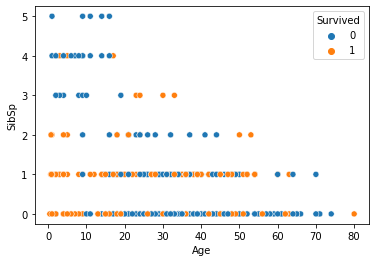

In [97]:
sn.scatterplot(df['Age'], df['SibSp'], hue=df['Survived'])

It looks like a mixture of deaths and survival. People with 0-20 age and 5 sibsp are all dead and people with 0 sibsp has mixture of deaths and survival.

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

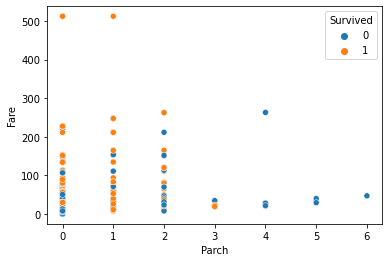

In [98]:
sn.scatterplot(df['Parch'], df['Fare'], hue=df['Survived'])

People above 3 parch are all dead and people with 0-2 parch are mixtures of survival and fare is upto 300.

<AxesSubplot:xlabel='Pclass', ylabel='Embarked'>

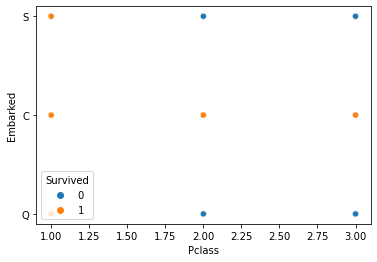

In [99]:
sn.scatterplot(df['Pclass'], df['Embarked'], hue=df['Survived'])

People in 1st class are all alive irrespective of the port they were embarked. 2nd and 3rd class people embarked in port C survived than port S,Q.

## Multi-variate Analysis

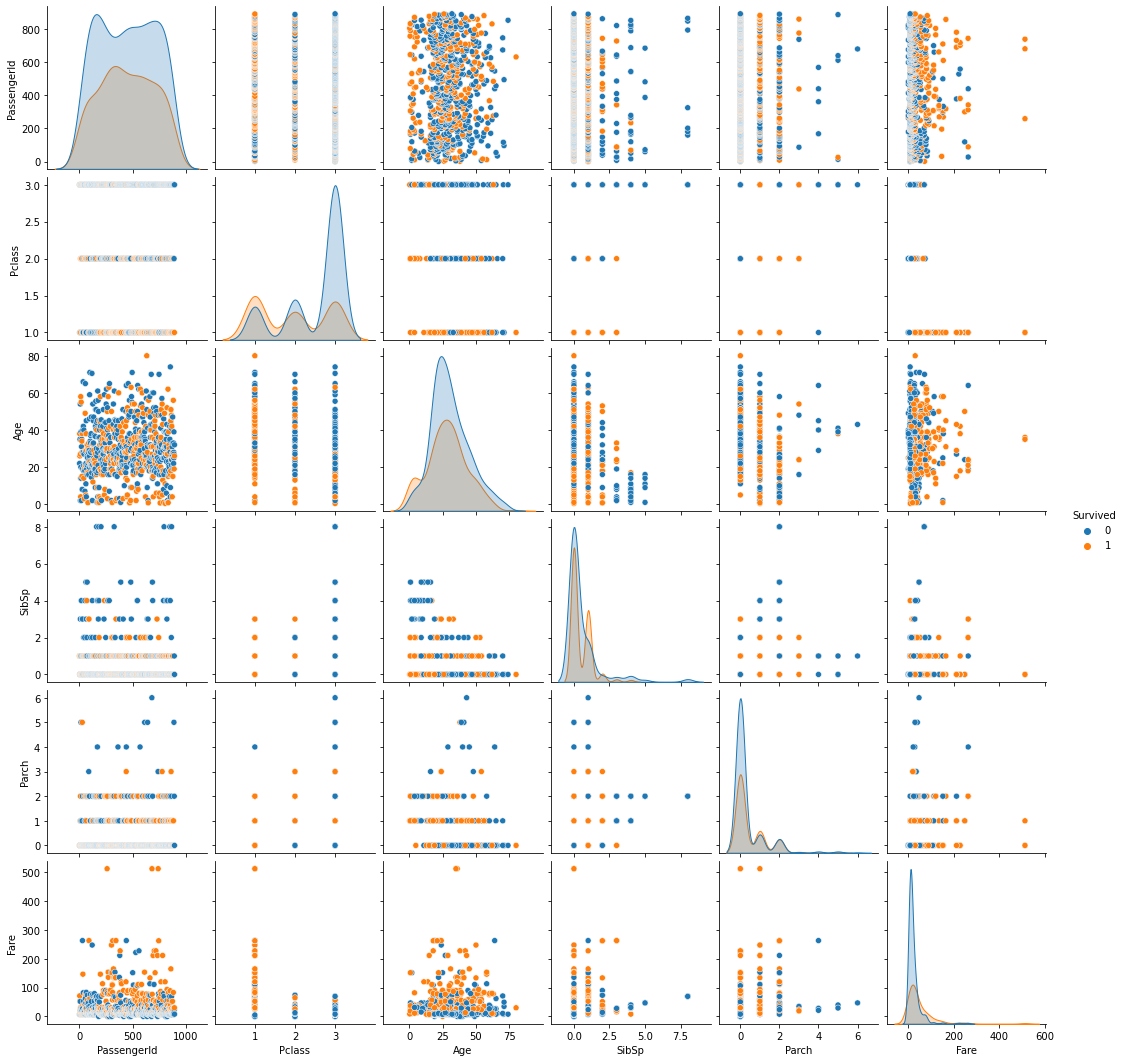

In [100]:
sn.pairplot(df, hue='Survived')

I can notice death rate is more in all paired plots. Which means the survival rate is very less.

### Identifying the outliers
I have continuous data only in Age and Fare column. So I will check outliers only in those 2 columns.
All other columns with outliers i.e. outliers in categorical columns has no meaning so no need to remove them.

<AxesSubplot:xlabel='Age'>

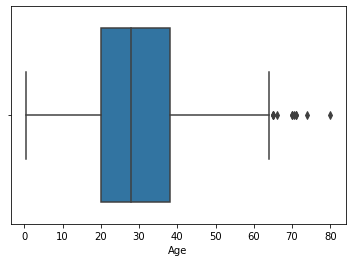

In [101]:
sn.boxplot(df['Age'])

I can see the outliers in Age

<AxesSubplot:xlabel='Fare'>

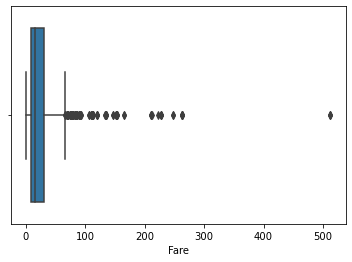

In [102]:
sn.boxplot(df['Fare'])

Outliers are there in Fare column too

## Data cleaning

#### Treating missing/null values

In [103]:
#Treating the Null values in Age, Cabin & Embarked

#Age is continuous & I noticed outliers. Hence, using median to remove null values
df["Age"]=df["Age"].fillna(df["Age"].median())

In [104]:
#Embarked is categorical column. Hence, using mode to remove null values
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [105]:
#Dropping down the cabin column as the there are too many(more than 77%) missing values.
df.drop('Cabin', axis = 1, inplace =True)

In [106]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now I can notice that there are no null values in my dataset.

#### Encoding

In [107]:
#Encoding all the categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['Name','Sex','Ticket','Embarked']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column].astype(str))   #.astype(str) will embed all values in str type

In [108]:
#checking the columns and its type after encoding
categorical_columns = ['Name','Sex','Ticket','Embarked']
for i in categorical_columns:
    df[i].unique()
    print(df[i])

0      108
1      190
2      353
3      272
4       15
      ... 
886    548
887    303
888    413
889     81
890    220
Name: Name, Length: 891, dtype: int32
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32
0      523
1      596
2      669
3       49
4      472
      ... 
886    101
887     14
888    675
889      8
890    466
Name: Ticket, Length: 891, dtype: int32
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32


I've successfully encoded all the categorical columns

### Removing outliers
Depending upon the previous analysis, I saw outliers in 2 continuous columns i.e. Age & Fare

##### Zscore:

In [109]:
#Making a variable as dfContCols and listing all columns with outliers.
dfContCols = df[["Age", "Fare"]]

In [110]:
from scipy.stats import zscore
ZS = np.abs(zscore(dfContCols))
df1 = df[(ZS<3).all(axis=1)]
df1.shape

(864, 11)

In [111]:
df.shape

(891, 11)

I've succefully removed the outliers using zscore and rows in my new dataset are 864 whereas previously we had 891 rows.

In [112]:
#Checking the data loss
((891-864)/891)*100

3.0303030303030303

So I get data loss of just 3% hence I'll proceed with zscore.

### Checking skewness

In [113]:
df1.skew()

PassengerId    0.011620
Survived       0.502011
Pclass        -0.708375
Name          -0.014382
Sex           -0.632203
Age            0.321096
SibSp          3.751753
Parch          2.840412
Ticket         0.012485
Fare           2.257178
Embarked      -1.328443
dtype: float64

I can see the skewness in Pclass, Sex, SibSp, Parch, Fare & Embarked.

In [144]:
#Creating list of all the columns with skewness
cols=['Pclass','Sex','SibSp','Parch','Fare','Embarked']

#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [145]:
df1[cols] = PT.fit_transform(df1[cols].values)
df1.skew()

PassengerId    0.011620
Survived       0.502011
Pclass        -0.480433
Name          -0.014382
Sex           -0.632203
Age            0.321096
SibSp          0.805038
Parch          1.277888
Ticket         0.012485
Fare          -0.009095
Embarked      -1.109262
dtype: float64

The skewness has been decreased by using yeo-johnson method

### Correlation matrix with heat map

In [146]:
cor = df1.corr()
cor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.014399,-0.029821,-0.043518,0.047309,0.026087,-0.053324,0.009120,-0.064635,-0.017867,0.016490
Survived,-0.014399,1.000000,-0.334725,-0.053716,-0.534012,-0.058724,0.103005,0.141854,-0.175168,0.322012,-0.153775
Pclass,-0.029821,-0.334725,1.000000,0.039166,0.129101,-0.335783,-0.060038,-0.001549,0.359153,-0.601053,0.054069
Name,-0.043518,-0.053716,0.039166,1.000000,0.020680,0.073091,-0.091281,-0.045219,0.058393,-0.039313,-0.015137
Sex,0.047309,-0.534012,0.129101,0.020680,1.000000,0.065600,-0.198531,-0.249661,0.061305,-0.262301,0.114884
Age,0.026087,-0.058724,-0.335783,0.073091,0.065600,1.000000,-0.157487,-0.270779,-0.097952,0.110097,-0.000692
SibSp,-0.053324,0.103005,-0.060038,-0.091281,-0.198531,-0.157487,1.000000,0.436627,0.012016,0.432721,-0.004257
Parch,0.009120,0.141854,-0.001549,-0.045219,-0.249661,-0.270779,0.436627,1.000000,0.003003,0.354063,0.029787
Ticket,-0.064635,-0.175168,0.359153,0.058393,0.061305,-0.097952,0.012016,0.003003,1.000000,-0.153268,0.022412
Fare,-0.017867,0.322012,-0.601053,-0.039313,-0.262301,0.110097,0.432721,0.354063,-0.153268,1.000000,-0.117631


I got all correlations of features with other features. Let me visualize it using heat map.

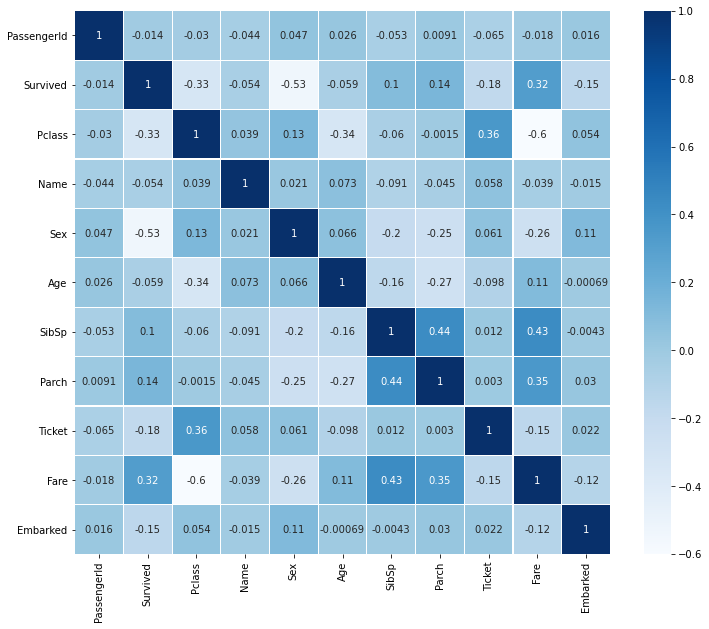

In [147]:
plt.figure(figsize=(12,10))
sn.heatmap(df1.corr(),linewidths=.1,cmap="Blues",annot=True, annot_kws={"size": 10})
plt.yticks(rotation=0);

From heatmap, I can observe that Embarked, SibSb, Age, Name, PassengerId columns aren't much correlated with our target column.
Hence, I can drop that later if needed.

#### Visualizing correlation of target variable using bar plot

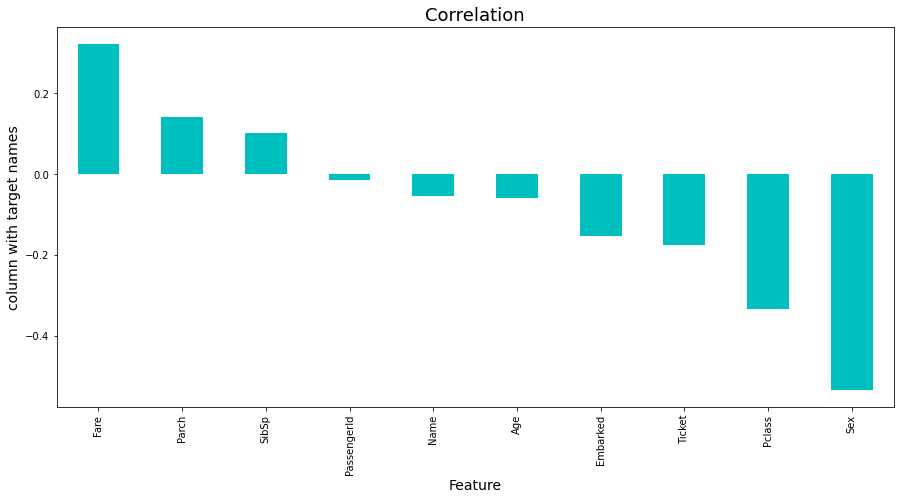

In [148]:
plt.figure(figsize=(15,7))
df1.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

PassengerID & Name are least correlated feature with target variable. I can remove that if needed.

### SEPARATE INDEPENDENT & TARGET VARIABLE

In [149]:
x = df1.drop("Survived",axis=1)
y = df1["Survived"]

### SCALING

In [150]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [151]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.000000,1.000000,0.121348,1.0,0.329064,0.83479,0.000000,0.769118,0.432617,1.00000
1,0.001124,0.000000,0.213483,0.0,0.573041,0.83479,0.000000,0.876471,0.848336,0.00000
2,0.002247,1.000000,0.396629,0.0,0.390058,0.00000,0.000000,0.983824,0.448186,1.00000
3,0.003371,0.000000,0.305618,0.0,0.527295,0.83479,0.000000,0.072059,0.794478,1.00000
4,0.004494,1.000000,0.016854,1.0,0.527295,0.00000,0.000000,0.694118,0.450936,1.00000
...,...,...,...,...,...,...,...,...,...,...
859,0.995506,0.352235,0.615730,1.0,0.405306,0.00000,0.000000,0.148529,0.536569,1.00000
860,0.996629,0.000000,0.340449,0.0,0.283318,0.00000,0.000000,0.020588,0.689575,1.00000
861,0.997753,1.000000,0.464045,0.0,0.420555,0.83479,0.990972,0.992647,0.644293,1.00000
862,0.998876,0.000000,0.091011,1.0,0.390058,0.00000,0.000000,0.011765,0.689575,0.00000


I've succesfully scaled the dataset using minmaxscaler

### Balancing target column using oversampling

In [152]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y=SM.fit_resample(x, y)
y.value_counts()

1    537
0    537
Name: Survived, dtype: int64

I can see that the targe column was balanced using SMOTE

### FIND BEST random_state 

In [153]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)    #We used accuracy_score as this is classification problem
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8668730650154799  on Random_state  34


Got best accuracy and random state.

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=maxRS)

I've created the train and test data where test data is 30% of my total data.

## FINDING BEST ALGORITHM

In [155]:
#importing the required libraries of classication algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

#### 1 Decision Tree Classifier

In [156]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred = DTC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       159
           1       0.85      0.88      0.86       164

    accuracy                           0.86       323
   macro avg       0.86      0.86      0.86       323
weighted avg       0.86      0.86      0.86       323



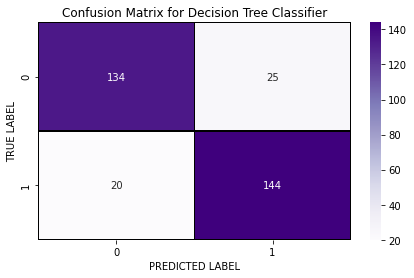

In [157]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(7,4))
sn.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
           xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

I can now see the true values and predicted values in Decision Tree Classifier model using confusion matrix.

#### 2 Random Forest Classifier

In [158]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred = RFC.predict(x_test)
acc = classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       159
           1       0.87      0.88      0.88       164

    accuracy                           0.87       323
   macro avg       0.87      0.87      0.87       323
weighted avg       0.87      0.87      0.87       323



#### 3 Support Vector Classifier

In [159]:
SV=SVC()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.86      0.78      0.82       164

    accuracy                           0.82       323
   macro avg       0.83      0.82      0.82       323
weighted avg       0.83      0.82      0.82       323



#### 4 Logistic Regression

In [160]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       159
           1       0.81      0.76      0.78       164

    accuracy                           0.79       323
   macro avg       0.79      0.79      0.79       323
weighted avg       0.79      0.79      0.79       323



#### 5 K-Neighbor Classifier

In [161]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       159
           1       0.82      0.85      0.83       164

    accuracy                           0.83       323
   macro avg       0.83      0.83      0.83       323
weighted avg       0.83      0.83      0.83       323



So accuracy scores for all the models are as follow:
1. Decision Tree Classifier - 86
2. Random Forest Classifier - 87
3. Support Vector Classifier- 82
4. Logistic Regression      - 79
5. K-Neighbor Classifier    - 83

## Cross Validation

In [162]:
#importing cross val library
from sklearn.model_selection import cross_val_score

In [163]:
print(cross_val_score(DTC, x, y, cv=5).mean())

0.5827515757444035


In [164]:
print(cross_val_score(RFC, x, y, cv=5).mean())

0.634827211475766


In [165]:
print(cross_val_score(SV, x, y, cv=5).mean())

0.8072419039339274


In [166]:
print(cross_val_score(LR, x, y, cv=5).mean())

0.7680938926320365


In [167]:
print(cross_val_score(knn, x, y, cv=5).mean())

0.7923842642903717


So cross validation scores for all the models are as follow:
1. Decision Tree Classifier - 58
2. Random Forest Classifier - 63
3. Support Vector Classifier- 81
4. Logistic Regression      - 77
5. K-Neighbor Classifier    - 79

By looking into the difference of accuracy of the model and its cross validation score, I can conclude that Support Vector Classifier is the best model with least difference.

## HYPERPARAMETER TUNING

In [169]:
#importing required library
from sklearn.model_selection import GridSearchCV

In [171]:
#Creating a dictionary of parameters for SVC called param_grid and filling out some parameters for kernels, C and gamma
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [173]:
#Create a GridSearchCV object and fit it to the training data
GCV = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [178]:
#Finding the optimal parameters
print(GCV.best_estimator_)

SVC(C=10, gamma=1)


In [179]:
#Using the best parameters to create a final model
Final_model=SVC(C=10, gamma=1)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

84.82972136222911


### After tuning, the accuracy increased to 84.82%

## ROC-AUC Curve

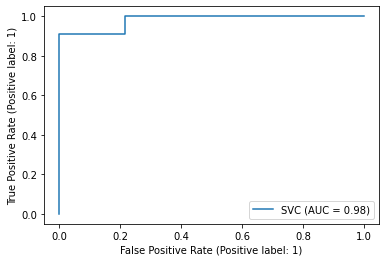

In [182]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = SVC(random_state=34)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the ROC-AUC curve for Support Vector Classifier model with AUC=0.98

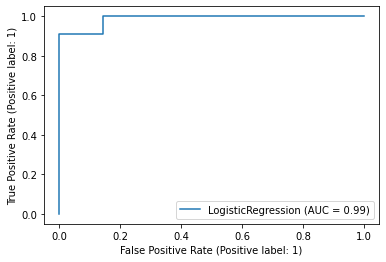

In [183]:
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = LogisticRegression(random_state=134)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the ROC-AUC curve for LogisticRegression model with AUC=0.99

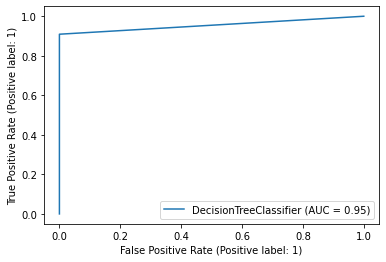

In [184]:
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = DecisionTreeClassifier(random_state=134)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the ROC-AUC curve for DecisionTreeClassifier model with AUC=0.95

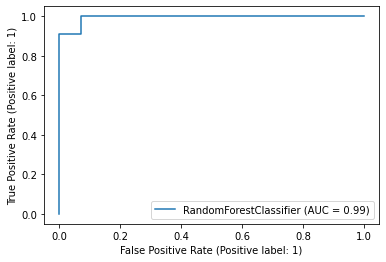

In [185]:
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = RandomForestClassifier(random_state=134)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the ROC-AUC curve for RandomForestClassifier model with AUC=0.99

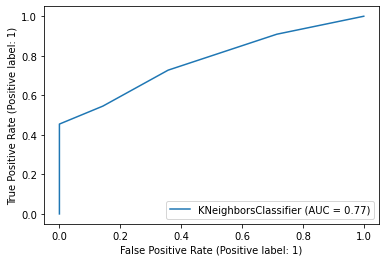

In [186]:
x, y = datasets.make_classification(random_state=1)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, random_state=1)
df = KNN()
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)  

plt.show()

This is the ROC-AUC curve for KNN model with AUC=0.77

## SERIALIZATON (Saving model)

In [188]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_model,"Titanic.pkl")

['Titanic.pkl']